In [1]:
import geopandas as gpd
import pandas as pd
import urllib.request as ur
import json
import geopandas as gpd
from shapely.geometry import Point, LineString
import math
%matplotlib inline

In [2]:
origin_coord = []
origin_coord.append([47.614572,-122.346023]) # origin
origin_coord.append([47.614437, -122.317527]) # dest
url = ur.urlopen('https://www.accessmap.io/api/v2/route.json?origin=' + str(origin_coord[0][0]) + '%2C' + str(origin_coord[0][1]) + '&destination=' + str(origin_coord[1][0]) + '%2C' + str(origin_coord[1][1]) + '')
d = url.read().decode() #decode("utf-8")

In [3]:
data = json.loads(d)

In [4]:
#https://stackoverflow.com/questions/21104592/json-to-pandas-dataframe

coord = []
coord.append([float(data['origin']['geometry']['coordinates'][0]), float(data['origin']['geometry']['coordinates'][1])])
for result in data['routes'][0]['geometry']['coordinates']:
    coord.append(result)
coord.append([float(data['destination']['geometry']['coordinates'][0]), float(data['destination']['geometry']['coordinates'][1])])

df = pd.DataFrame(coord)

In [5]:
#https://gis.stackexchange.com/questions/174159/convert-a-pandas-dataframe-to-a-geodataframe

geometry = [Point(xy) for xy in zip(df[0], df[1])]
gdf = gpd.GeoDataFrame(geometry=geometry)

In [6]:
list1 = []
for i in range(0, len(gdf) - 1):
    list1.append(LineString([gdf.geometry[i], gdf.geometry[i+1]]).buffer(0.0001))
dataframe = pd.DataFrame(list1)
dataframe.columns = ['geometry']

In [7]:
gdf = gpd.GeoDataFrame(dataframe.geometry)

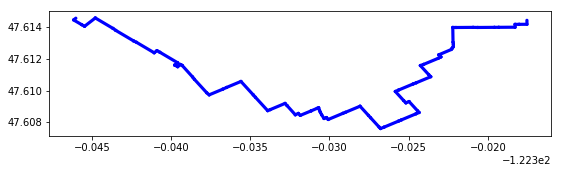

In [8]:
gdf.plot(color='blue', figsize=(9,9))

In [9]:
#http://michelleful.github.io/code-blog/2015/04/29/geopandas-manipulation/

all_data = gpd.read_file("SidewalkObservations.shp")
issue_data = all_data[all_data.SURFACE_CO != ""]

count = 0
for region in gdf.geometry:
    for point in issue_data.geometry:
        if point.within(region) is True: 
            count += 1
            break
count

30